# Results visualization

## packages

In [1]:
import seaborn as sns
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

In [2]:
print(os.getcwd())

C:\Users\Administrator-1\Desktop\New folder (6)\HI\ML\Extra_experiment_concatenate_0vs1_axis


In [3]:
sns.set(style = "whitegrid")

# Path

In [4]:
path =  os.getcwd()+"\\training_process\\"

# Methods

In [5]:
def plot_vali(x,title):
    x = x[:,1]
    plt.figure(figsize=(7,5))
    plt.title(f'validation performance for {title}')
    plt.plot(x, label='validation MSE',marker='o')
    plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend()
    plt.show()
    print("validation mean=",np.mean(x))
    print("validation std=",np.std(x))

In [6]:
def plot_test(x,title):
    x = x[:,2]
    plt.figure(figsize=(7,5))
    plt.title(f'testing performance for {title}')
    plt.plot(x, label='testing MSE',marker='o')
    plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
    print("test mean=",np.mean(x))
    print("test std=",np.std(x))

In [7]:
def plot_vali_test(x,title):
    x1 = x[:, 1]
    x2 = x[:, 2]
    plt.figure(figsize=(7,5))
    plt.title(f'Testing and validation for {title}')
    plt.plot(x1, label='validation MSE',marker='o')
    plt.plot(x2, label='testing MSE',marker='o')
    #plt.plot([], [], ' ', label=f"mean={round(np.mean(x),6)}")
    #plt.plot([], [], ' ', label=f"std={round(np.std(x),6)}")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.grid()
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
    #print("validation mean=",np.mean(x))
    #print("validation std=",np.std(x))

In [8]:
def vali_mse_comparison(mse_dict):
    plt.figure(figsize=(7,5))
    for x,y in mse_dict.items():
        y = y.to_numpy(copy=True)
        y = y[:,1]
        plt.plot(y, label=x,marker='o')
        plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'validation MSE by different representations')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.legend(prop={'size': 8})
    

In [9]:
def test_mse_comparison(mse_dict):
    plt.figure(figsize=(7,5))
    for x,y in mse_dict.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        plt.plot(y, label=x,marker='o')
    plt.grid()
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.title(f'testing MSE by different representations')
    plt.xlabel('Trail')
    plt.ylabel('MSE')
    plt.grid()
    plt.legend(prop={'size': 8})

In [42]:
def swarmplot_vali(dictt, rotation, fontsize):
    plt.figure(figsize=(10,5))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,1]
        A.append(y)
        labelss.append(x)
    ax = sns.swarmplot(A)
    ax.grid()
    if(rotation==45):
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize,ha='right', rotation_mode='anchor')
    else:
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)
    plt.title(f'validation MSE')
    plt.ylabel('MSE')
    plt.show()

In [43]:
def swarmplot_test(dictt, rotation,fontsize):
    plt.figure(figsize=(10,5))
    A = []
    labelss = []
    for x,y in dictt.items():
        y= y.to_numpy(copy=True)
        y = y[:,2]
        A.append(y)
        labelss.append(x)
    ax = sns.swarmplot(A)
    ax.grid()
    if(rotation==45):
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize,ha='right', rotation_mode='anchor')
    else:
        ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)
    plt.title(f'testing MSE')
    plt.ylabel('MSE')
    plt.show()

# Read CSV

In [44]:
index_concate_0 = pd.read_csv(path + "0.csv")
index_concate_1 = pd.read_csv(path + "index_concatenate_s2.csv")

## PART 1: Different data representations on transformer.

In [45]:
mse_dict = {
    "concate_1": index_concate_1,
    "concate_0": index_concate_0,
}

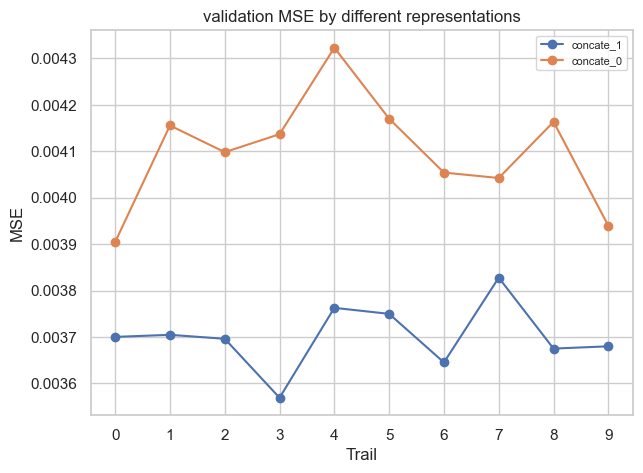

In [46]:
vali_mse_comparison(mse_dict)

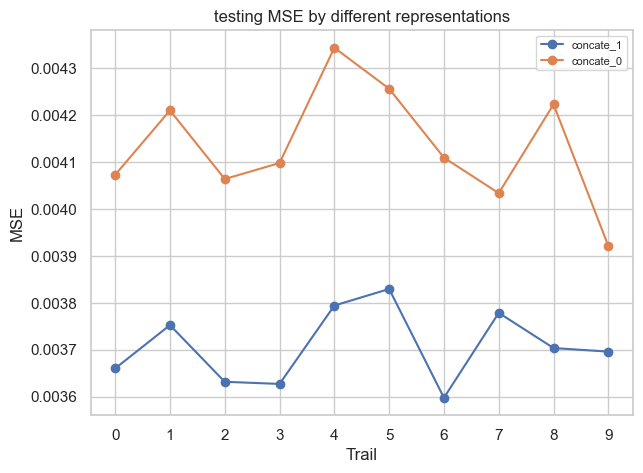

In [47]:
test_mse_comparison(mse_dict)

C:\Users\Administrator-1\AppData\Local\Temp\ipykernel_5200\2652390541.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)


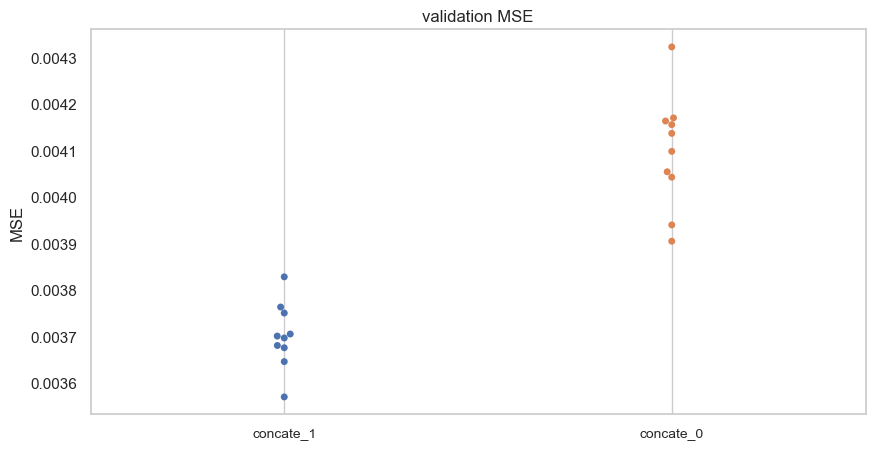

In [48]:
swarmplot_vali(mse_dict, 0, 10)

C:\Users\Administrator-1\AppData\Local\Temp\ipykernel_5200\1266501540.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labelss, rotation=rotation, fontsize = fontsize)


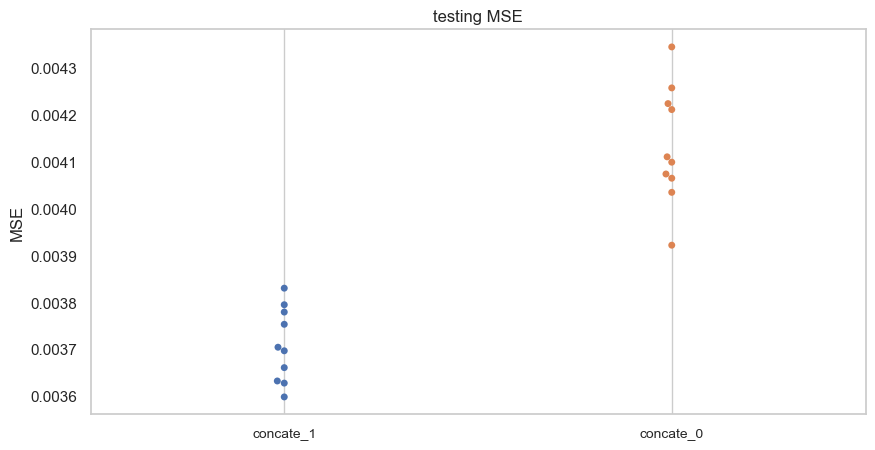

In [49]:
swarmplot_test(mse_dict, 0, 10)

### The mean and std of each representations

In [50]:
def get_mean_std(x):
    return np.mean(x), np.std(x)

In [51]:
print("validation performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    validation_mse = y[:,1]
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(validation_mse)
    m2 ,s2 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

validation performance
 mean=0.003701, std=0.000066  for concate_1
 mean=0.004099, std=0.000115  for concate_0


In [52]:
print("testing performance")
for x,y in mse_dict.items():
    y = y.to_numpy(copy=True)
    test_mse = y[:,2] 
    m1 ,s1 = get_mean_std(test_mse)
    print(f" mean={m1:.6f}, std={s1:.6f}  for {x}")

testing performance
 mean=0.003707, std=0.000075  for concate_1
 mean=0.004133, std=0.000118  for concate_0
